In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import files
uploaded = files.upload()

Saving customer churn analysis.csv to customer churn analysis (1).csv


In [7]:
df = pd.read_csv('customer churn analysis.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Replacing blanks with 0 as tenure is 0 and no total charges are recorded.

In [8]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.isnull().sum().sum()

np.int64(0)

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
df["customerID"].duplicated().sum()

np.int64(0)

In [13]:
def conv(value):
  if value == 1:
    return "yes"
  else:
      return "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

Coverted o and 1 values of senior citizen to yes/no to maake it easier to understand

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


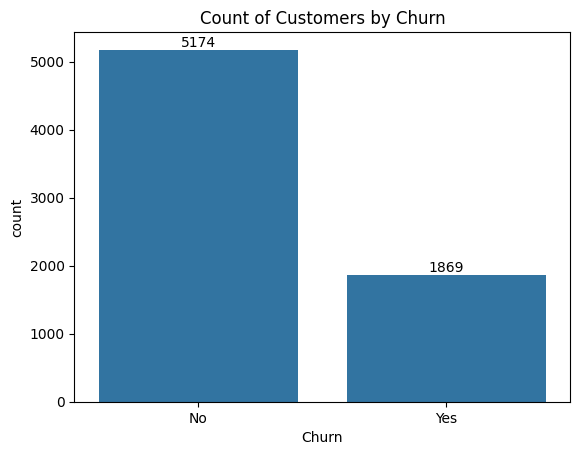

In [15]:
ax= sns.countplot(x='Churn', data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

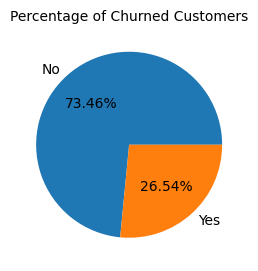

In [16]:
plt.figure(figsize=(3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels = gb.index, autopct="%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize=10)
plt.show()

From the given pie chart we can conclude that 26.54% of our customers have churned out
Now lets explore reason behind it

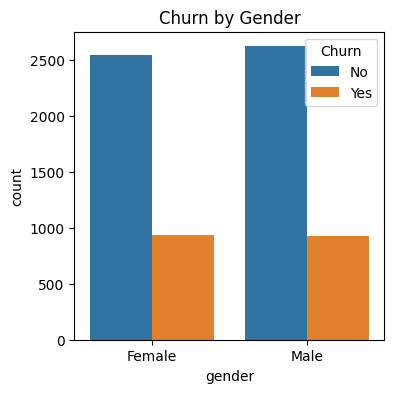

In [17]:
plt.figure(figsize=(4,4))
sns.countplot(x="gender", data=df, hue='Churn')
plt.title("Churn by Gender")
plt.show()


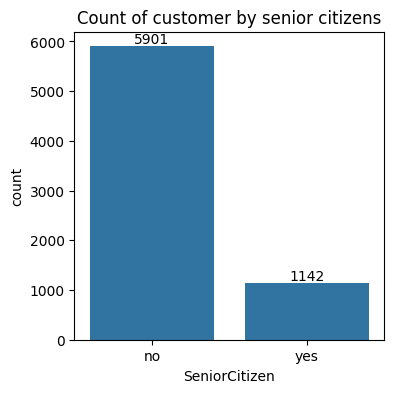

In [18]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="SeniorCitizen", data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of customer by senior citizens")
plt.show()

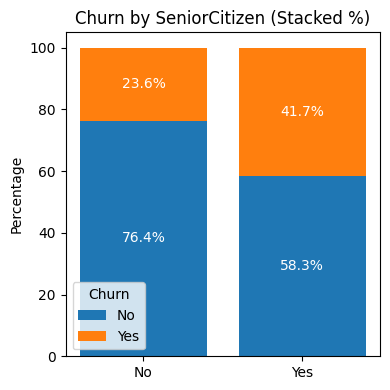

In [19]:
grouped = df.groupby(['SeniorCitizen', 'Churn']).size().unstack().fillna(0)

# Step 2: Convert to percentage
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Step 3: Plot
fig, ax = plt.subplots(figsize=(4,4))

bottom = [0, 0]
colors = ['#1f77b4', '#ff7f0e']  # Optional: Customize churn color

for i, churn_value in enumerate(percentages.columns):
    ax.bar(
        percentages.index,
        percentages[churn_value],
        bottom=bottom,
        label=churn_value,
        color=colors[i]
    )
    for j, val in enumerate(percentages[churn_value]):
        ax.text(
            j, bottom[j] + val / 2, f'{val:.1f}%',
            ha='center', va='center', color='white', fontsize=10
        )
        bottom[j] += val

# Labels and title
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])
ax.set_ylabel('Percentage')
ax.set_title('Churn by SeniorCitizen (Stacked %)')
ax.legend(title='Churn')

plt.tight_layout()
plt.show()

Comparative a greated percentage of people in senior citizen category have churned

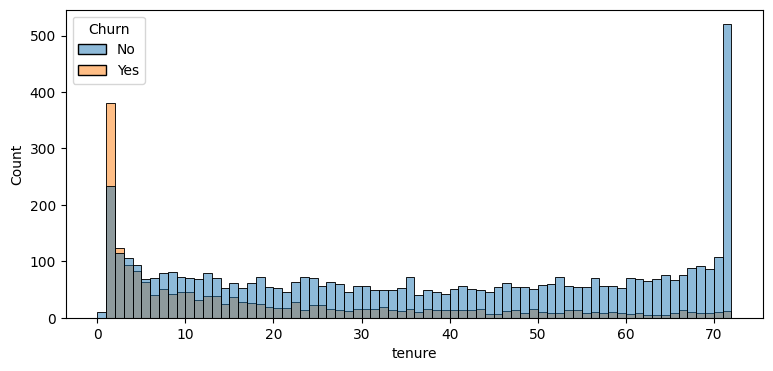

In [20]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure", data=df, bins=72, hue="Churn")
plt.show()

People who have used our services for a long time have stayed and people who have used our services 1 or 2 months have churned

/tmp/ipython-input-21-2529313212.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack().fillna(0)


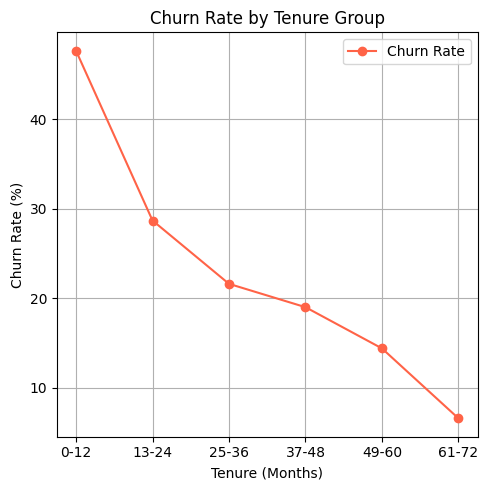

In [21]:
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True)

# Calculate churn rate for each tenure group
tenure_churn = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack().fillna(0)
tenure_churn = tenure_churn * 100  # Convert to percentages

# Plot line chart
plt.figure(figsize=(5,5))
plt.plot(tenure_churn.index, tenure_churn['Yes'], marker='o', color='tomato', label='Churn Rate')
plt.title('Churn Rate by Tenure Group')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


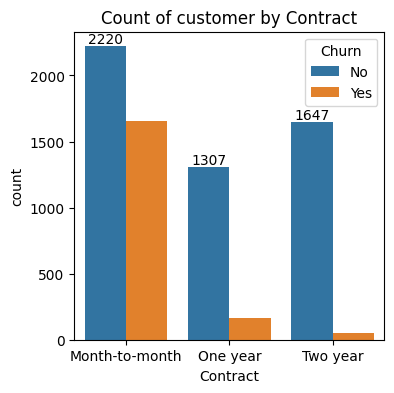

In [22]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract", data=df, hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of customer by Contract")
plt.show()

People who have month to month contract are likely to churn then from who have 1 or 2 years or contract

In [23]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'], dtype=object)

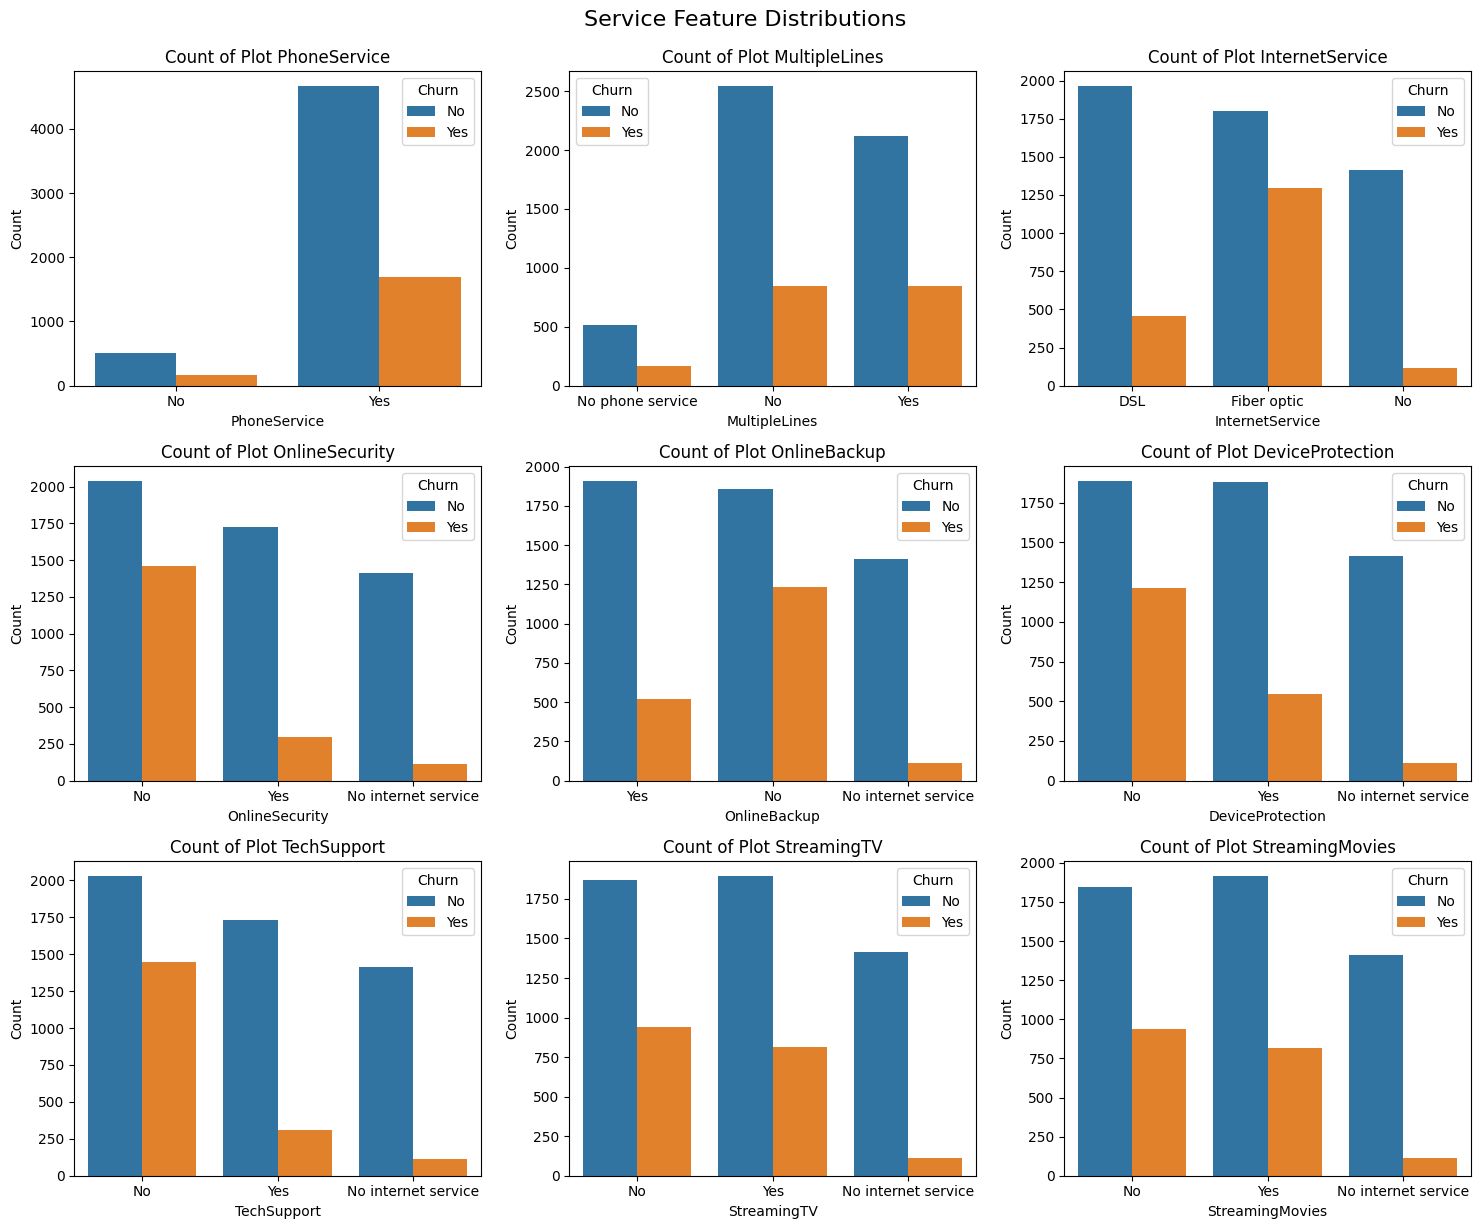

In [24]:

# List of service columns
service_cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set number of rows and columns in the subplot grid
n_cols = 3
n_rows = (len(service_cols) + n_cols - 1) // n_cols  # Automatic row calculation

# Set up the figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

# Create each subplot
for i, col in enumerate(service_cols):
    sns.countplot(data=df, x=col, ax=axes[i], hue= df['Churn'])
    axes[i].set_title(f'Count of Plot {col}')
    axes[i].set_xlabel
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Service Feature Distributions', fontsize=16, y=1.02)
plt.show()


Customers without optional services (like OnlineSecurity, TechSupport, DeviceProtection) show a higher churn rate compared to those with these services.

🔹Fiber optic users have noticeably higher churn than DSL or no-internet users.

🔹In most service features, customers with "No" or "No internet service" have a greater proportion of churners.

🔹Overall, engagement with services seems to be inversely related to churn—those using more services tend to stay longer.

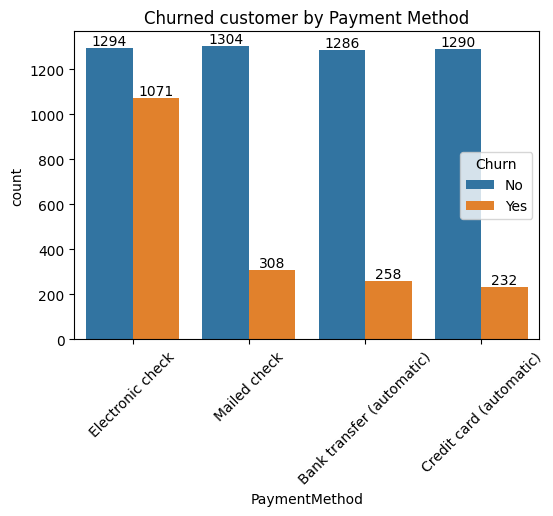

In [25]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x="PaymentMethod", data=df, hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned customer by Payment Method")
plt.xticks(rotation=45)
plt.show()

Customer is likely to churn when he is using electronic check as payment method

In [26]:
df['Segment'] = 'Loyal'
df.loc[(df['tenure'] < 6) & (df['MonthlyCharges'] > 70), 'Segment'] = 'At Risk'
df.loc[(df['tenure'] < 3) & (df['MonthlyCharges'] < 30), 'Segment'] = 'Dormant'


<Axes: xlabel='Segment', ylabel='count'>

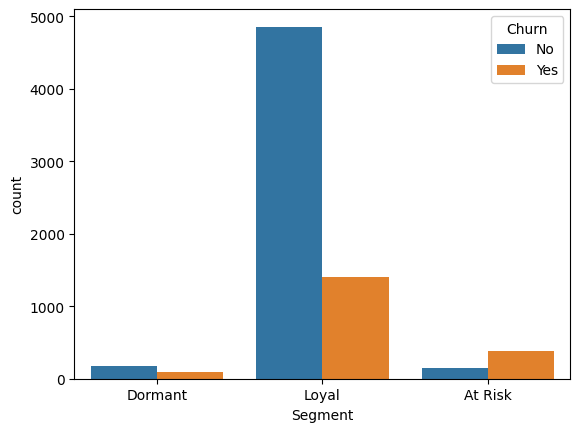

In [27]:
sns.countplot(x='Segment', hue='Churn', data=df)


At-risk users need immediate attention to reduce churn.

Dormant users may be targeted for reactivation campaigns.

Loyal users can be rewarded to improve brand trust.



In [28]:
!pip install eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 2.7 MB/s eta 0:00:00


In [29]:
!pip install pandasql


  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=313132f6684097cea6c8e1e6d54721d881688ba244015315fe7e34eff7701299
  Stored in directory: /root/.cache/pip/wheels/68/5d/a5/edc271b998f909801d7956959f699b976cc9896075dc47c153
Successfully built pandasql


In [30]:
import pandasql as psql

# Query 1: Churn count by contract type
query1 = """
SELECT Contract,
       COUNT(*) AS Total_Customers,
       SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END) AS Churned_Customers
FROM df
GROUP BY Contract
"""
print("Churn count by contract type:")
print(psql.sqldf(query1, locals()))



Churn count by contract type:
         Contract  Total_Customers  Churned_Customers
0  Month-to-month             3875               1655
1        One year             1473                166
2        Two year             1695                 48


Customers with month-to-month contracts have a churn rate, which is significantly higher than one-year and two-year contracts.

This indicates short-term contracts are a strong churn predictor, and customers on longer contracts are more loyal.

In [31]:
# Query 2: Average monthly charges by Internet Service
query2 = """
SELECT InternetService,
       AVG(MonthlyCharges) AS Avg_Monthly_Charges
FROM df
GROUP BY InternetService
"""
print("\nAverage Monthly Charges by Internet Service:")
print(psql.sqldf(query2, locals()))



Average Monthly Charges by Internet Service:
  InternetService  Avg_Monthly_Charges
0             DSL            58.102169
1     Fiber optic            91.500129
2              No            21.079194


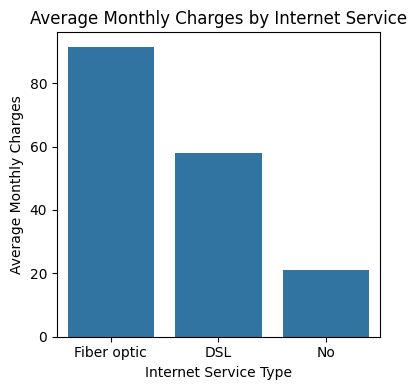

In [32]:
avg_monthly_by_internet = df.groupby('InternetService')['MonthlyCharges'].mean().reset_index()
avg_monthly_by_internet = avg_monthly_by_internet.sort_values(by='MonthlyCharges', ascending=False)
plt.figure(figsize=(4, 4))
sns.barplot(data=avg_monthly_by_internet, x='InternetService', y='MonthlyCharges')


plt.title('Average Monthly Charges by Internet Service')
plt.xlabel('Internet Service Type')
plt.ylabel('Average Monthly Charges')
plt.tight_layout()
plt.show()

Fiber optic users pay the most, which likely reflects high-speed usage and added services.

The high cost may contribute to higher churn risk among fiber optic users

In [33]:
# Query 3: Churn rate by payment method
query3 = """
SELECT PaymentMethod,
       COUNT(*) AS Total,
       ROUND(100.0 * SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS Churn_Percentage
FROM df
GROUP BY PaymentMethod
"""
print("\nChurn percentage by Payment Method:")
print(psql.sqldf(query3, locals()))


Churn percentage by Payment Method:
               PaymentMethod  Total  Churn_Percentage
0  Bank transfer (automatic)   1544             16.71
1    Credit card (automatic)   1522             15.24
2           Electronic check   2365             45.29
3               Mailed check   1612             19.11


People who use electronic checks are leaving the company the most — almost half of them stop using the service. This could mean they don’t fully trust the digital payment process.

Customers who pay automatically using a bank account or credit card stay much longer. These users are likely more comfortable with the service or find it easier to stay subscribed.



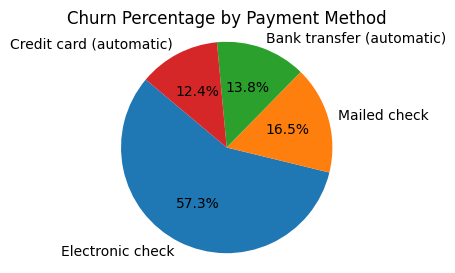

In [34]:
churned = df[df['Churn'] == 'Yes']
churn_by_payment = churned['PaymentMethod'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(churn_by_payment, labels=churn_by_payment.index, autopct='%1.1f%%', startangle=140)
plt.title('Churn Percentage by Payment Method')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.show()

In [35]:
from sklearn.preprocessing import LabelEncoder

df_model = df.copy()

# Drop rows with blank TotalCharges (optional if already handled)
df_model = df_model[df_model["TotalCharges"] != " "]
df_model["TotalCharges"] = df_model["TotalCharges"].astype(float)

# Encode categorical variables
le = LabelEncoder()
for column in df_model.columns:
    if df_model[column].dtype == 'object' and column != 'customerID':
        df_model[column] = le.fit_transform(df_model[column])


In [38]:
from sklearn.model_selection import train_test_split

X = df_model.drop(columns=["customerID", "Churn", "tenure_group"])
y = df_model["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[951  85]
 [200 173]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.46      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.78      1409

Accuracy Score: 0.7977288857345636


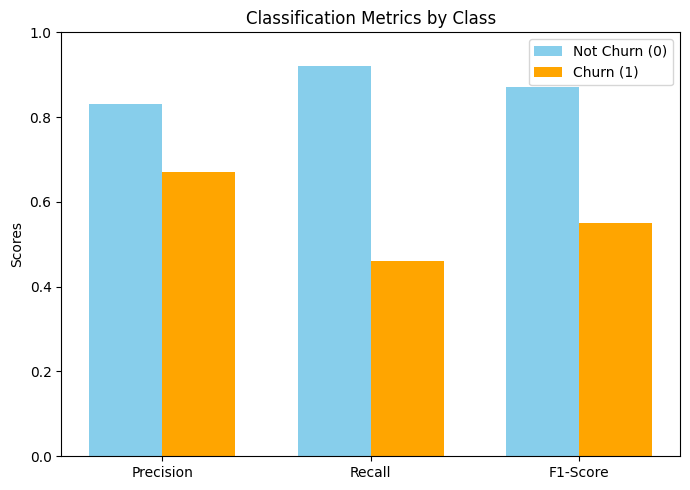

In [40]:
labels = ['Precision', 'Recall', 'F1-Score']
class_0 = [0.83, 0.92, 0.87]
class_1 = [0.67, 0.46, 0.55]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(7, 5))
bars1 = ax.bar(x - width/2, class_0, width, label='Not Churn (0)', color='skyblue')
bars2 = ax.bar(x + width/2, class_1, width, label='Churn (1)', color='orange')

# Labels and titles
ax.set_ylabel('Scores')
ax.set_title('Classification Metrics by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [41]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=42).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Weight,Feature
0.0192 ± 0.0073,Contract
0.0116 ± 0.0115,MonthlyCharges
0.0102 ± 0.0069,tenure
0.0075 ± 0.0098,TotalCharges
0.0065 ± 0.0075,TechSupport
0.0065 ± 0.0029,StreamingTV
0.0062 ± 0.0037,PaymentMethod
0.0054 ± 0.0054,InternetService
0.0034 ± 0.0017,SeniorCitizen
0.0027 ± 0.0019,DeviceProtection


Customers on month-to-month contracts, with fiber optic internet, and those who lack online security or tech support services are more likely to churn.

Lower tenure customers (i.e., newer users) also show a higher risk of leaving.

Interestingly, even paperless Billing and Auto-payment users exhibit churn tendencies, likely due to low engagement.

These insights suggest the need to focus on long-term contracts, upselling add-on services, and improving engagement with new and digital-first customers.